In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from os.path import join

sns.set_style("ticks")

In [18]:
fedrl_data = pd.read_csv("fedrl_data.csv")
marl_data  = pd.read_csv(join("out", "models", "2021-4-9_14.10", "marl_data.csv"))
sarl_data  = pd.read_csv("sarl_data.csv")

In [19]:
fedrl_data["kind"] = ["FedRL" for i in range(len(fedrl_data))]
marl_data["kind"] = ["MARL" for i in range(len(marl_data))]
sarl_data["kind"] = ["SARL" for i in range(len(sarl_data))]
data = pd.concat([fedrl_data, marl_data, sarl_data])

In [20]:
fedrl_data_filename = "fedrl_data.csv"
fedrl_data = pd.read_csv(fedrl_data_filename)
marl_data_filename = "marl_data.csv"
marl_data = pd.read_csv(marl_data_filename)
sarl_data_filename = "sarl_data.csv"
sarl_data = pd.read_csv(sarl_data_filename)

In [21]:
fed_rounds = data.query("fed_round == True")["round"].values
print(fed_rounds)

[ 5  5 10 10 15 15 20 20 25 25 30 30 35 35 40 40 45 45 50 50 55 55 60 60
 65 65 70 70 75 75 80 80 85 85 90 90 95 95]


In [22]:
print(marl_data["policy_reward_mean"])
print(marl_data["episode_reward_mean"])

0     -3.968400e+09
1     -9.147658e+09
2     -2.762668e+09
3     -7.581927e+09
4     -4.576742e+09
           ...     
195   -5.072553e+09
196   -1.136339e+09
197   -5.077719e+09
198   -1.130266e+09
199   -5.027659e+09
Name: policy_reward_mean, Length: 200, dtype: float64
0     -1.311606e+10
1     -1.311606e+10
2     -1.034460e+10
3     -1.034460e+10
4     -1.609043e+10
           ...     
195   -6.184287e+09
196   -6.214059e+09
197   -6.214059e+09
198   -6.157925e+09
199   -6.157925e+09
Name: episode_reward_mean, Length: 200, dtype: float64


# Challenge
One issue with the data will be the fact that *single-agent reinforcement learning* (SARL) does not discriminate against policies (because there is only one policy). This means that `policy_reward_mean`, `policy_reward_max`, and `policy_reward_min` are nonexistant values and cannot be directly plotted. 

We will need to do some data preprocessing here.

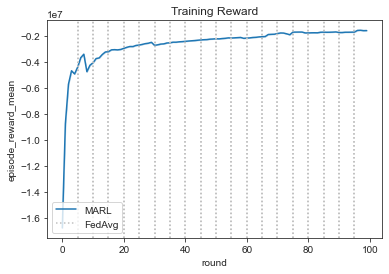

In [31]:
sns.lineplot(x="round", y="episode_reward_mean", hue="kind", data=data.query("kind == 'MARL'"))
# sns.lineplot(x="round", y="policy_reward_max",  style="policy", data=data)
# sns.lineplot(x="round", y="policy_reward_min",  style="policy", data=data)
ax = plt.gca()
first = True
for fr in fed_rounds:
    if first:
        ax.axvline(x=fr, color="silver", linestyle=":", label="FedAvg")
        first = False
    else:
        ax.axvline(x=fr, color="silver", linestyle=":")
plt.title("Training Reward")
plt.legend()
plt.savefig("training.pdf")
plt.show()

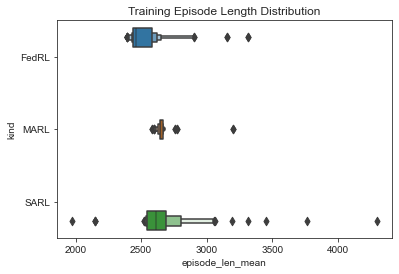

In [24]:
sns.boxenplot(data=data, hue="kind", y="kind", x="episode_len_mean")
plt.legend().remove()
plt.title("Training Episode Length Distribution")
plt.show()

In [25]:
multi_data = data.query("kind == 'FedRL' or kind == 'MARL'")
multi_data.head()

,Unnamed: 0,round,trainer,policy,fed_round,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,...,time_total_s,pid,hostname,node_ip,config,time_since_restore,timesteps_since_restore,iterations_since_restore,perf,kind
0,0,0,MARL,gneJ12,False,-2.249990e+10,-2.249990e+10,-2.249990e+10,3314.00,1,...,89.452110,24757,nathaniels-imac.lan,192.168.86.26,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",89.452110,0,1,"{'cpu_util_percent': 28.52857142857143, 'ram_u...",FedRL
1,1,0,MARL,light1,False,-2.249990e+10,-2.249990e+10,-2.249990e+10,3314.00,1,...,89.452110,24757,nathaniels-imac.lan,192.168.86.26,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",89.452110,0,1,"{'cpu_util_percent': 28.52857142857143, 'ram_u...",FedRL
2,2,1,MARL,gneJ12,False,-1.952268e+10,-2.249990e+10,-2.101129e+10,3156.50,1,...,171.153652,24757,nathaniels-imac.lan,192.168.86.26,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",171.153652,0,2,"{'cpu_util_percent': 31.095652173913038, 'ram_...",FedRL
3,3,1,MARL,light1,False,-1.952268e+10,-2.249990e+10,-2.101129e+10,3156.50,1,...,171.153652,24757,nathaniels-imac.lan,192.168.86.26,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",171.153652,0,2,"{'cpu_util_percent': 31.095652173913038, 'ram_...",FedRL
4,4,2,MARL,gneJ12,False,-1.724519e+10,-3.611155e+10,-2.384483e+10,2903.25,2,...,260.237261,24757,nathaniels-imac.lan,192.168.86.26,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",260.237261,0,3,"{'cpu_util_percent': 29.4976, 'ram_util_percen...",FedRL


In [26]:
multi_data = multi_data.astype({"policy_reward_mean": "float32"})

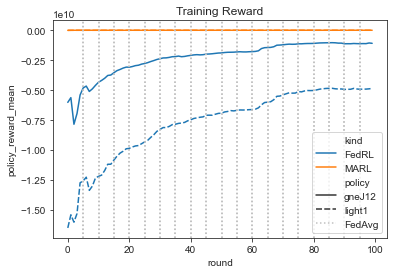

In [27]:
sns.lineplot(x="round", y="policy_reward_mean", style="policy", hue="kind", data=multi_data)
# sns.lineplot(x="round", y="policy_reward_max",  style="policy", data=data)
# sns.lineplot(x="round", y="policy_reward_min",  style="policy", data=data)
ax = plt.gca()
first = True
for fr in fed_rounds:
    if first:
        ax.axvline(x=fr, color="silver", linestyle=":", label="FedAvg")
        first = False
    else:
        ax.axvline(x=fr, color="silver", linestyle=":")
plt.title("Training Reward")
plt.legend()
plt.savefig("by_policy.pdf")
plt.show()